Marcos Gonzalez  
Homework #7  
3/9/21

# Homework 9

This assignment uses a data set with building information about sales in New York City over a 12 month period.  The data is originally from Kaggle [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and can be downloaded directly from the URL: [http://comet.lehman.cuny.edu/owen/teaching/mat328/nyc-rolling-sales.csv](http://comet.lehman.cuny.edu/owen/teaching/mat328/nyc-rolling-sales.csv).
 

### Question 1: Load and clean the data

In this dataset, the missing values are indicated by " -  " (a space, a dash, two spaces).

Clean the data so that the remaining rows:
* have no NaN values
* have sales prices between \$20,000 and \$2,000,000.  (That is, remove all rows with sales price less than \$20,000 or more than \$2,000,000)
* have only the neighborhoods Flushing-North, Sheepshead Bay, or Flatbush-East
* have Gross Square Feet greater than 0 and less than 6,000

- Loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

%matplotlib inline

In [15]:
nyc = pd.read_csv("http://comet.lehman.cuny.edu/owen/teaching/mat328/nyc-rolling-sales.csv", na_values = " -  ")
nyc

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


- removing NaN values

In [27]:
missing_sale = nyc["SALE PRICE"].isna()
nyc_sale = nyc[~ missing_sale]
missing_land = nyc_sale["LAND SQUARE FEET"].isna()
nyc_land = nyc_sale[~ missing_land]
missing_gross = nyc_land["GROSS SQUARE FEET"].isna()
nyc2 = nyc_land[~ missing_gross]
nyc2

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


- filter to only have sales prices between 20,000 𝑎𝑛𝑑 2,000,000
- filter to only have neighborhoods Flushing-North, Sheepshead Bay, or Flatbush-East
- filter to only have Gross Square Feet greater than 0 and less than 6,000

In [50]:
flushing_filter = nyc2["NEIGHBORHOOD"] == "FLUSHING-NORTH"
sheep_filter = nyc2["NEIGHBORHOOD"] == "SHEEPSHEAD BAY"
flatbush_filter = nyc2["NEIGHBORHOOD"] == "FLATBUSH-EAST"
nyc3 = nyc2[flushing_filter | sheep_filter | flatbush_filter]

sales_filter_lower = nyc3["SALE PRICE"] >= 20000
sales_filter_upper = nyc3["SALE PRICE"] <= 2000000
nyc4 = nyc3[sales_filter_lower & sales_filter_upper]

gross_filter_lower = nyc4["GROSS SQUARE FEET"] > 0
gross_filter_upper = nyc4["GROSS SQUARE FEET"] < 6000
nyc_clean = nyc4[gross_filter_lower & gross_filter_upper]
nyc_clean

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
37716,12365,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1,4681,61,,A9,195 EAST 55TH STREET,...,1,0,1,1875.0,1344.0,1910,1,A9,215000.0,2016-09-15 00:00:00
37720,12369,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1,4695,27,,A9,466 EAST 48TH STREET,...,1,0,1,3000.0,1240.0,1910,1,A9,422500.0,2017-07-10 00:00:00
37721,12370,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1,4695,48,,A9,923 SCHENECTADY AVENUE,...,1,0,1,2000.0,1300.0,1920,1,A9,355500.0,2016-10-13 00:00:00
37725,12374,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1,4719,31,,A1,546 EAST 48TH STREET,...,1,0,1,2500.0,1036.0,1915,1,A1,485000.0,2017-03-27 00:00:00
37726,12375,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1,4719,61,,A9,987 SCHENECTADY AVENUE,...,1,0,1,2000.0,1536.0,1910,1,A9,180000.0,2017-05-05 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58805,9407,4,FLUSHING-NORTH,22 STORE BUILDINGS,4,5203,4,,K1,143-08/10 45TH AVENUE,...,0,2,2,3000.0,2550.0,1931,4,K1,1400000.0,2016-10-28 00:00:00
58813,9415,4,FLUSHING-NORTH,22 STORE BUILDINGS,4,5420,75,,K4,43-69 162ND STREET,...,1,1,2,2000.0,2000.0,1920,4,K4,1000000.0,2017-07-27 00:00:00
58815,9417,4,FLUSHING-NORTH,22 STORE BUILDINGS,4,5516,13,,K1,192-08 NORTHERN BOULEVARD,...,0,2,2,3748.0,2800.0,1954,4,K1,1700000.0,2017-01-26 00:00:00
58817,9419,4,FLUSHING-NORTH,22 STORE BUILDINGS,4,5601,37,,K1,46-13 188TH STREET,...,0,2,2,1040.0,980.0,1932,4,K1,875000.0,2016-12-22 00:00:00


### Question 2:  Exploratory data analysis

Create a scatter plot of Gross Square Feet (x) vs. Sale Price (y) with the points colored by neighborhood.  What do you notice about the plot?

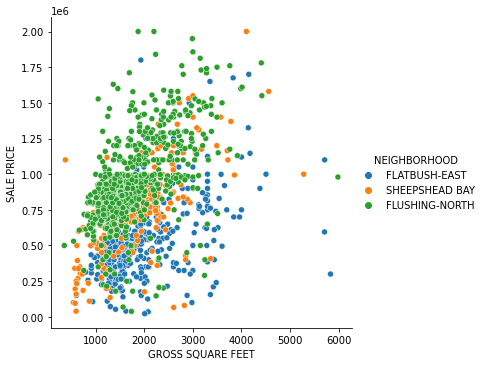

In [51]:
sns.relplot(x = "GROSS SQUARE FEET", y = "SALE PRICE", hue = "NEIGHBORHOOD", data = nyc_clean)

A large amount of the buildings in flushing-north seem to be the more expensive to the ones in flatbush-east and sheepshead bay.

### Question 3: Dummy variables

Create dummy variables for the neighborhood column, and create a linear model (see note below) to predict the sales price (as the dependent variable) using the two neighborhood dummy variables and the gross square feet as the independent variables.  
* What is the equation for the regression line?  
* What equation is used to make a prediction when the neighborhood is Flushing-North?  Flatbush-East?  Sheepshead Bay?  


Note: Since the column names have spaces, you will need to either rename them (can do as part of cleaning the data) or surround them with Q('column_name') in the Statsmodel formula.  For example if the independent variable column names are "Ind Var" and "Ind Var 2", and the dependent variable column name is "Dep Var" in the dataframe df, then the code to fit the linear model is:
    
`lm = smf.ols("Q('Dep Var') ~ Q('Ind Var') + Q('Ind Var 2')", data = df).fit()`

In [52]:
nyc_new = pd.get_dummies(nyc_clean, columns = ["NEIGHBORHOOD"], drop_first = True)
nyc_new

,Unnamed: 0,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,NEIGHBORHOOD_FLUSHING-NORTH,NEIGHBORHOOD_SHEEPSHEAD BAY
37716,12365,3,01 ONE FAMILY DWELLINGS,1,4681,61,,A9,195 EAST 55TH STREET,,...,1,1875.0,1344.0,1910,1,A9,215000.0,2016-09-15 00:00:00,0,0
37720,12369,3,01 ONE FAMILY DWELLINGS,1,4695,27,,A9,466 EAST 48TH STREET,,...,1,3000.0,1240.0,1910,1,A9,422500.0,2017-07-10 00:00:00,0,0
37721,12370,3,01 ONE FAMILY DWELLINGS,1,4695,48,,A9,923 SCHENECTADY AVENUE,,...,1,2000.0,1300.0,1920,1,A9,355500.0,2016-10-13 00:00:00,0,0
37725,12374,3,01 ONE FAMILY DWELLINGS,1,4719,31,,A1,546 EAST 48TH STREET,,...,1,2500.0,1036.0,1915,1,A1,485000.0,2017-03-27 00:00:00,0,0
37726,12375,3,01 ONE FAMILY DWELLINGS,1,4719,61,,A9,987 SCHENECTADY AVENUE,,...,1,2000.0,1536.0,1910,1,A9,180000.0,2017-05-05 00:00:00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58805,9407,4,22 STORE BUILDINGS,4,5203,4,,K1,143-08/10 45TH AVENUE,,...,2,3000.0,2550.0,1931,4,K1,1400000.0,2016-10-28 00:00:00,1,0
58813,9415,4,22 STORE BUILDINGS,4,5420,75,,K4,43-69 162ND STREET,,...,2,2000.0,2000.0,1920,4,K4,1000000.0,2017-07-27 00:00:00,1,0
58815,9417,4,22 STORE BUILDINGS,4,5516,13,,K1,192-08 NORTHERN BOULEVARD,,...,2,3748.0,2800.0,1954,4,K1,1700000.0,2017-01-26 00:00:00,1,0
58817,9419,4,22 STORE BUILDINGS,4,5601,37,,K1,46-13 188TH STREET,,...,2,1040.0,980.0,1932,4,K1,875000.0,2016-12-22 00:00:00,1,0


In [53]:
lm = smf.ols("Q('SALE PRICE') ~ Q('NEIGHBORHOOD_FLUSHING-NORTH') + Q('NEIGHBORHOOD_SHEEPSHEAD BAY') + Q('GROSS SQUARE FEET')", data = nyc_new).fit()

In [54]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('SALE PRICE')   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     413.9
Date:                Tue, 09 Mar 2021   Prob (F-statistic):          2.03e-193
Time:                        17:32:13   Log-Likelihood:                -19777.
No. Observations:                1432   AIC:                         3.956e+04
Df Residuals:                    1428   BIC:                         3.958e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1.756e+05   2.04e+04      8.623      0.000    1.36e+05    2.16e+05
Q('NEIGHBORHOOD_FLUSHING-NORTH')  4.123e+05   1.45e+04     28.421      0.000    3.84e+05    4.41e+05
Q('NEIGHBORHOOD_SHEEPSHEAD BAY')  2.077e+05    1.9e+04     10.903      0.000     1.7e+05    2.45e+05
Q('GROSS SQUARE FEET')             202.6754      8.887     22.806      0.000     185.243     220.108
==============================================================================
Omnibus:                      101.289   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.821
Skew:                          -0.089   Prob(JB):                    3.51e-103
Kurtosis:                       5.806   Cond. No.                     7.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- equation for the regression line


$$Y = 9.7733 + 16.2075X_1 + 10.6459X_2 + 202.6754X_3$$

- Flushing-North

$$Y = 9.7733 + 16.2075(1) + 10.6459(0) + 202.6754X_3$$

- Flatbush-East

$$Y = 9.7733 + 16.2075(0) + 10.6459(0) + 202.6754X_3$$

- Sheepshead Bay

$$Y = 9.7733 + 16.2075(0) + 10.6459(1) + 202.6754X_3$$

### Question 4:  Assessing linear model

Assess the fit of your linear model from Question 3 by:
* finding the p-value for the intercept and coefficients
* finding R-squared 
* plotting the residuals
* plotting the actual sale price on the x axis and the residuals on the y axis

Based on the above information, how good of fit is your model?  Are there any problems with it?

p-value: all the p-values are 0.000  
R-squared:	0.465

<AxesSubplot:>

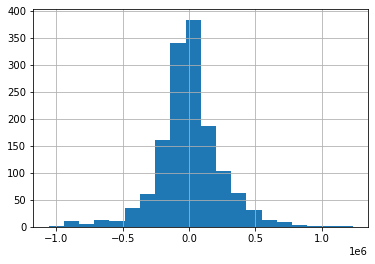

In [56]:
lm.resid.hist(bins = 20)

It seems to be a normal distribution and is centered at 0.

Text(0, 0.5, 'Residual')

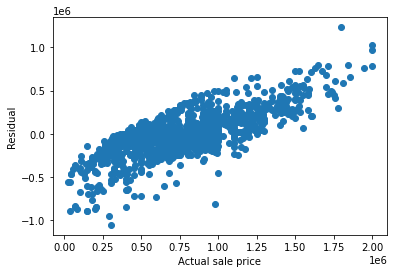

In [57]:
plt.scatter(x = nyc_new["SALE PRICE"], y = lm.resid)
plt.xlabel("Actual sale price")
plt.ylabel("Residual")

### Bonus Question

In Question 3 you wrote 3 linear equations for predicting the sale price if a building was in Flatbush-East, Flushing-North, or Sheepshead Bay.  Plot lines given by the 3 equations on a scatterplot of gross square feet (x) vs. sale price.  What does the plot tell you about real estate in Flatbush-East, Flushing-North, and Sheepshead Bay?    Hint:  See the end of Section 3 in Lab 9